In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
dataset = pd.read_csv('HumanWeightDataset.csv')

### EXPLORATORY DATA ANALYSIS (EDA)

In [52]:
df = pd.DataFrame(dataset)

In [53]:
df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [54]:
df.tail()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170
236,2,2,3391,1120


In [55]:
df.info

<bound method DataFrame.info of      Gender  Age Range  Head Size(cm^3)  Brain Weight(grams)
0         1          1             4512                 1530
1         1          1             3738                 1297
2         1          1             4261                 1335
3         1          1             3777                 1282
4         1          1             4177                 1590
..      ...        ...              ...                  ...
232       2          2             3214                 1110
233       2          2             3394                 1215
234       2          2             3233                 1104
235       2          2             3352                 1170
236       2          2             3391                 1120

[237 rows x 4 columns]>

In [56]:
df.isnull().sum()

Gender                 0
Age Range              0
Head Size(cm^3)        0
Brain Weight(grams)    0
dtype: int64

In [57]:
df.describe()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


### DATA CLEANING

In [58]:
df = df[:]
df.Gender = df.Gender.astype(str)
gender={'1':'Male','2':'Female'}
df['Gender']=df['Gender'].map(gender)
df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,Male,1,4512,1530
1,Male,1,3738,1297
2,Male,1,4261,1335
3,Male,1,3777,1282
4,Male,1,4177,1590


In [62]:
# df.rename({'Age Range': 'Age'}, axis=1, inplace=True)
# df.Age = df.Age.astype(str)
# age={'1':'Above 18','2':'Below 18'}
# df['Age']=df['Age'].map(age)
df.head()

,Gender,Age,Head Size(cm^3),Brain Weight(grams)
0,Male,Above 18,4512,1530
1,Male,Above 18,3738,1297
2,Male,Above 18,4261,1335
3,Male,Above 18,3777,1282
4,Male,Above 18,4177,1590


### DATA VIZ & DATA ANALYSIS

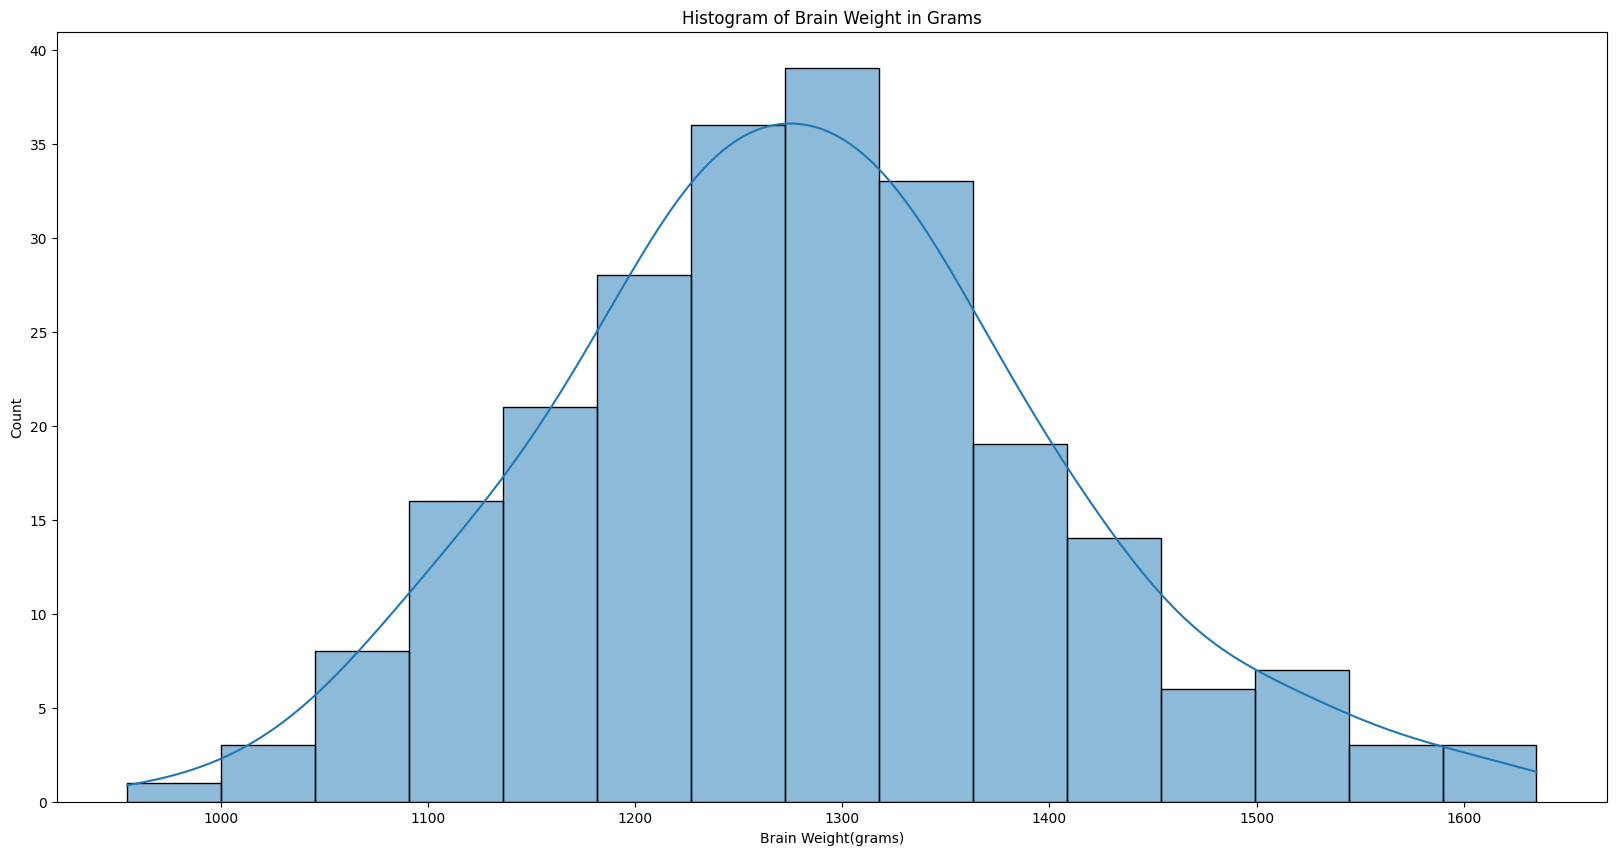

In [60]:
plt.figure(figsize=(20,10))
plt.title('Histogram of Brain Weight in Grams')
sns.histplot(data=df, x='Brain Weight(grams)', kde=True, bins=15);

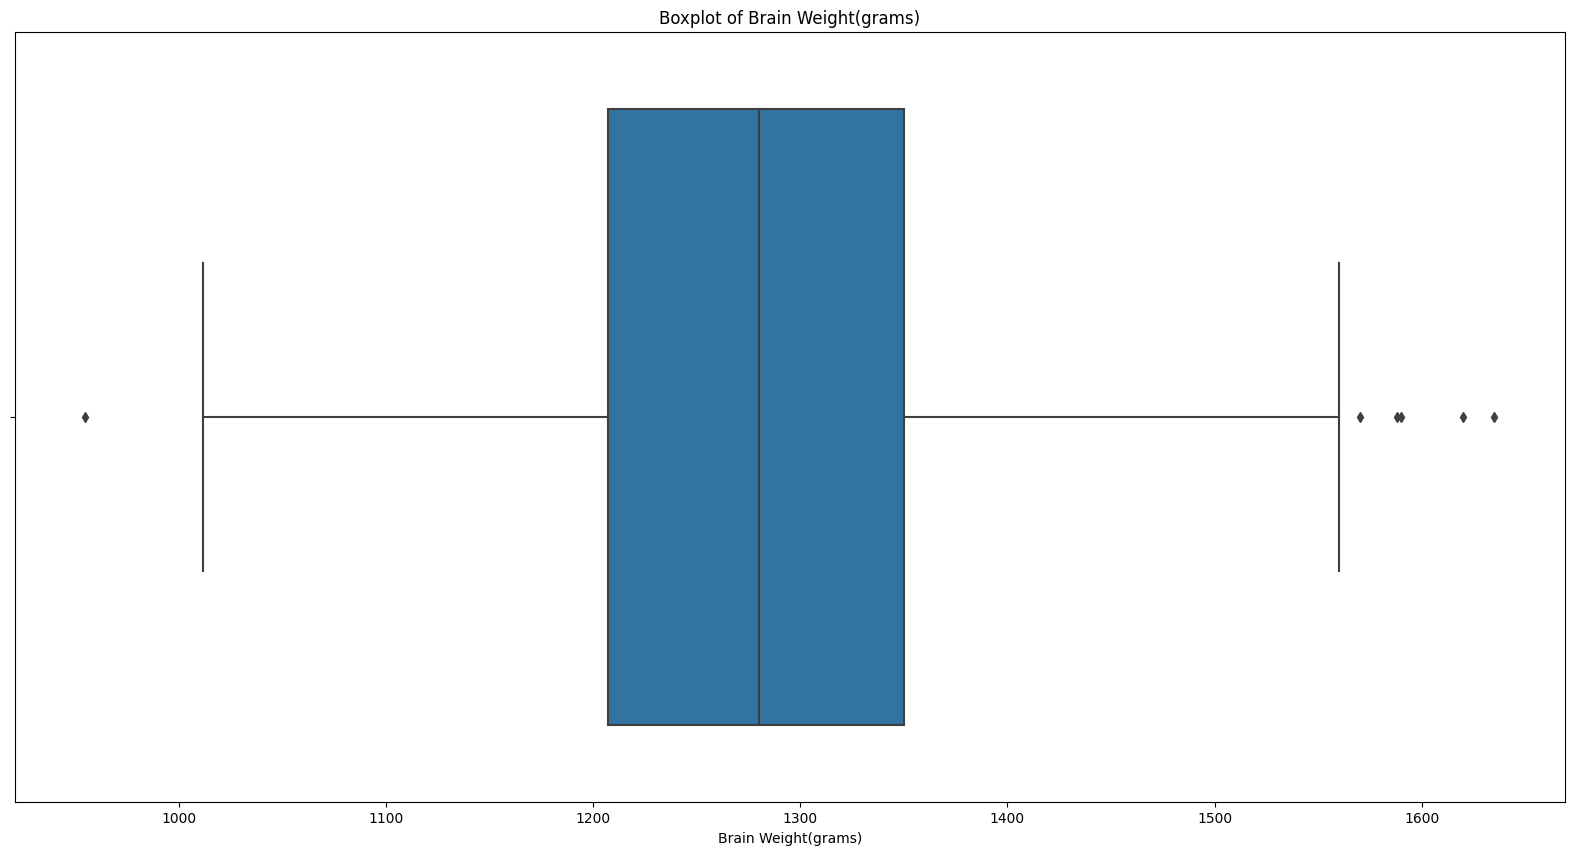

In [61]:
plt.figure(figsize=(20,10))
plt.title('Boxplot of Brain Weight(grams)')
sns.boxplot(data=df, x='Brain Weight(grams)');

<Axes: xlabel='Age', ylabel='Head Size(cm^3)'>

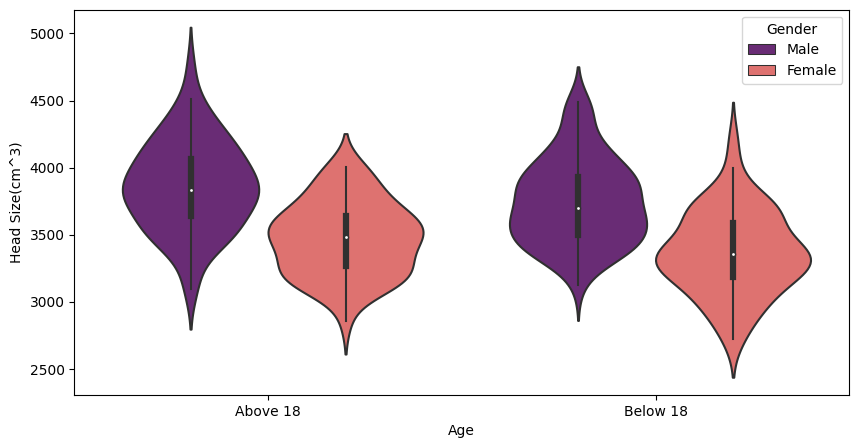

In [65]:
plt.figure(figsize=(10,5))
sns.violinplot(x='Age',y='Head Size(cm^3)',data=df,palette='magma',hue='Gender')

### LINEAR REGRESSION

In [66]:
X = dataset['Head Size(cm^3)'].values
Y = dataset['Brain Weight(grams)'].values

x_mean = np.mean(X)
y_mean = np.mean(Y)

n = len(X)

numerator = 0
denominator = 0
for i in range(n):
    numerator += (X[i] - x_mean) * (Y[i] - y_mean)
    denominator += (X[i] - x_mean) ** 2
    
b1 = numerator / denominator
b0 = y_mean - (b1 * x_mean)

print(b1, b0)

0.26342933948939945 325.57342104944223


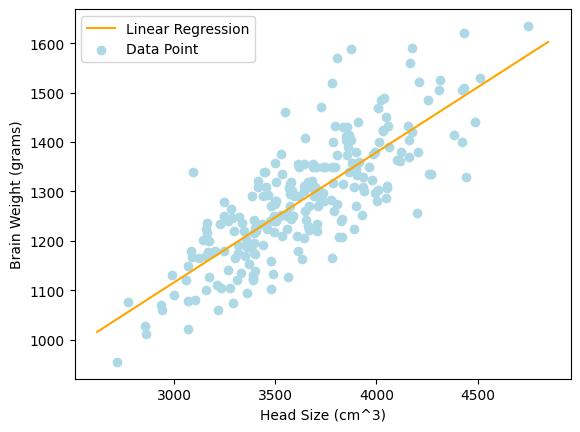

In [72]:
x_max = np.max(X) + 100
x_min = np.min(X) - 100

x = np.linspace(x_min, x_max, 1000)
y = b0 + b1 * x

plt.plot(x, y, color='orange', label='Linear Regression')

plt.scatter(X, Y, color='lightblue', label='Data Point')

plt.xlabel('Head Size (cm^3)')
plt.ylabel('Brain Weight (grams)')

plt.legend()
plt.show()

In [68]:
sumofsquares = 0
sumofresiduals = 0

for i in range(n) :
    y_pred = b0 + b1 * X[i]
    sumofsquares += (Y[i] - y_mean) ** 2
    sumofresiduals += (Y[i] - y_pred) **2
    
score  = 1 - (sumofresiduals/sumofsquares)

print("Score : ",score)

Score :  0.6393117199570003
